In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat

## 这个练习的目的是学习神经网络的反向传播  
### 第一步 首先读取matlab格式的数据文件  
matlab文件中存储了两个矩阵X和y，通过loadmat函数转换为numpy的ndarray数据类型。X矩阵对应5000条数据的数据集，每条数据是一个20*20的灰度图像，用行向量的形式存储；y对应每个图像的分类结果

In [2]:
data = loadmat('ex4data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [3]:
X=data['X']
y=data['y']
X = np.insert(X, 0, values=np.ones(X.shape[0]), axis=1)      #插入了第一列（全部为1）
#将X，y转换为numpy中的matrix,theta也初始化为matrix
X = np.matrix(X)
y = np.matrix(y)

### 数据文件可视化

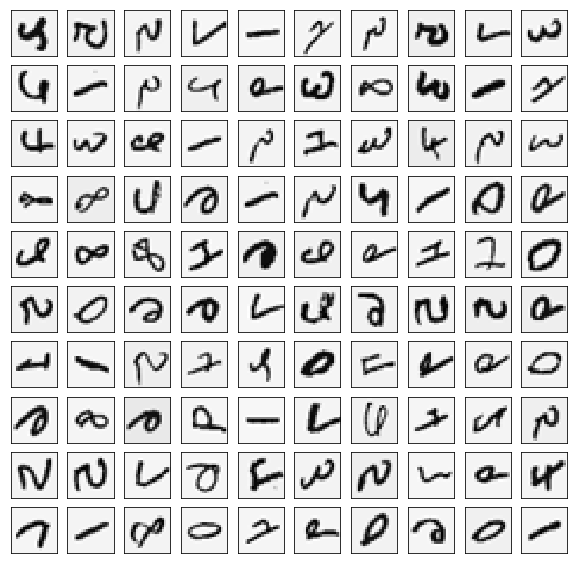

[2] [5] [5] [7] [1] [4] [5] [5] [7] [3] 

[2] [1] [5] [2] [9] [3] [8] [3] [1] [4] 

[7] [3] [2] [1] [5] [4] [3] [7] [5] [3] 

[8] [8] [2] [6] [1] [5] [2] [1] [10] [9] 

[2] [8] [8] [4] [6] [2] [9] [4] [4] [10] 

[5] [10] [6] [6] [7] [2] [6] [5] [5] [9] 

[1] [1] [5] [4] [2] [10] [7] [9] [9] [10] 

[6] [8] [6] [9] [1] [7] [2] [4] [2] [5] 

[5] [5] [7] [6] [7] [3] [5] [3] [9] [7] 

[6] [1] [8] [10] [4] [9] [10] [6] [10] [1] 



In [5]:
fig, ax = plt.subplots(10,10,figsize=(10, 10))
sample_idx = np.random.choice(np.arange(X.shape[0]), 100)  # 在400的范围内生成100个随机数
sample_images = X[sample_idx, :]
sample_ys = y[sample_idx, :]
for i in range(10):
    for j in range(10):
        image = sample_images[10*i+j].reshape((20, 20))
        ax[i][j].matshow(image, cmap=plt.cm.binary)
        ax[i][j].set_xticks(np.array([]))  # just get rid of ticks
        ax[i][j].set_yticks(np.array([]))
plt.show()
for i in range(10):
    for j in range(10):
        print(sample_ys[10*i+j],end=' ')
    print('\n')
   

### 读取matlab格式的权重数据文件  
matlab文件中存储了两个矩阵Theta1和Theta2，通过loadmat函数转换为numpy的ndarray数据类型。Theta1的shape为 25乘401,Theta2的shape为 10乘26

In [4]:
data2 = loadmat('ex4weights.mat')
theta1 = data2['Theta1']
theta2 = data2['Theta2']
theta1 = np.matrix(theta1)
theta2 = np.matrix(theta2)

### 定义SIGMOID函数  
g 代表一个常用的逻辑函数（logistic function）为S形函数（Sigmoid function），公式为： $$g\left( z \right)=\frac{1}{1+{{e}^{-z}}}$$ 合起来，我们得到逻辑回归模型的假设函数： $${{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}$$

In [5]:
def sigmoid( x ):  #注意，参数x可以为一个数，也可以是ndarray
    return 1 / ( 1 + np.exp ( - x) )

### 通过神经网络进行前向预测  
注意：X，theta，y的数据类型均为numpy中的matrix。X为添加bias列的特征矩阵，theta1，theta2为第一层和第二层的参数矩阵，每行对应一个神经元的特征向量，行数即神经元的数目。返回值idx，pro为列表类型，分别对应预测分类和预测可能性${{h}_{\theta }}\left( x \right)$的值。返回值result为分类预测矩阵，对应每个分类器的预测结果，每个分类器对应result中的一列

In [6]:
def Forword( X,theta1,theta2,y):  #X为添加bias列的特征矩阵，theta1，theta2为第一层和第二层的参数矩阵，每行对应一个神经元的特征向量，行数即神经元的数目
    z2 = X*theta1.T
    a2 = sigmoid( z2 )
    a2 = a2.A
    a2 = np.insert(a2, 0, values=np.ones(a2.shape[0]), axis=1)
    a2 = np.matrix(a2)
    z3 = a2*theta2.T
    a3 = sigmoid( z3 )
    result = a3.A     #result对应
    idx = np.argmax(result, axis=1)+1 #每行最大值的下标，+1是对应的预测值
    pro = np.amax(result, axis=1)   #每行最大值
    result = np.matrix(a3)
    return result,idx,pro
Hypo,idx,pro = Forword(X,theta1,theta2,y)
correct = [1 if (a == b) else 0 for (a, b) in zip(idx, y)]      #注意学习此处语法
accuracy = sum(correct) / len(correct)
accuracy

0.9752

### 定义前向预测的代价函数  
注意：X，theta，y的数据类型均为numpy中的matrix。X为特征矩阵，theta为列向量，y为列向量
注意：如果使用a=b（a，b为矩阵）, 则a只是建立一个对b的引用，所有对a的操作都会改变b的值

In [7]:
def ComputeCost(Hypo,y): #X为前向预测矩阵，每列对应一个分类器的预测结果，y为结果矩阵，每行对应一个数据的预测结果，结果用行向量表示，对应分类为1，其他分类为0
    result = np.zeros(Hypo.shape)
    for i in range(y.shape[0]):
        result[i] = np.zeros( Hypo.shape[1])
        result[i,y[i,0]-1] = 1
    y = result
    cost = np.zeros( y.shape[0] )
    for i in range(y.shape[0]):
        first = ( -y[i] )* np.log(Hypo[i].T)
        second = ( 1-y[i] )* np.log( 1-Hypo[i].T)
        cost[i] = (first - second)
    return  np.sum(cost)/len(X)

### 计算theta1,theta2对应的代价

In [8]:
cost = ComputeCost(Hypo,y)
cost

0.2876291651613189


### regularized cost（正则化代价函数）
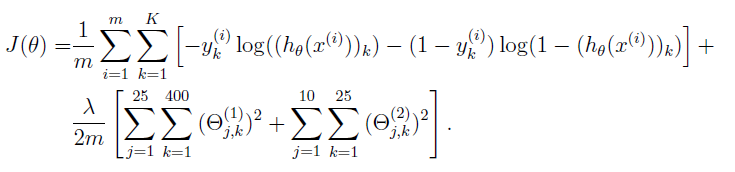

In [9]:
def ComputeCost_Reg(Hypo,y,theta1,theta2,numda): #X为前向预测矩阵，每列对应一个分类器的预测结果，y为结果矩阵，每行对应一个数据的预测结果，结果用行向量表示，对应分类为1，其他分类为0
    result = np.zeros(Hypo.shape)
    for i in range(y.shape[0]):
        result[i] = np.zeros( Hypo.shape[1])
        result[i,y[i,0]-1] = 1
    y = result
    cost = np.zeros( y.shape[0] )
    for i in range(y.shape[0]):
        first = ( -y[i] )* np.log(Hypo[i].T)
        second = ( 1-y[i] )* np.log( 1-Hypo[i].T)
        cost[i] = (first - second)/len(X)
    theta1_reg = theta1[:,1:]
    theta2_reg = theta2[:,1:]
    reg = (numda / (2 * len(X))) * ( np.sum(np.power(theta1, 2)) + np.sum(np.power(theta2, 2)) )
    return  np.sum(cost)+reg


In [10]:
cost = ComputeCost_Reg(Hypo,y,theta1,theta2,1)
cost

0.3844877962428939

## 下面开始实现神经网络的反向传播  
### 首先定义sigmoid的导函数  
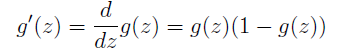

In [13]:
def sigmoid_Gradient( x ):  #注意，参数x可以为一个数，也可以是ndarray
    return sigmoid(x)*( 1 - sigmoid ( x ) )

可视化sigmoid函数，看看sigmoid函数是否正确

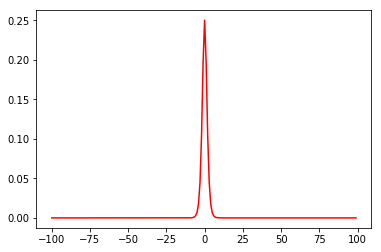

In [14]:
num = np.arange(-100,100)
plt.plot( num,sigmoid_Gradient(num), 'r-')


### batch gradient decent（批量梯度下降）
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta \right)$$
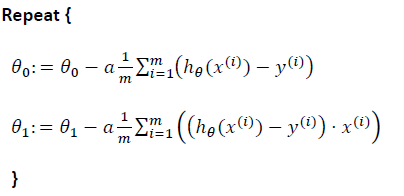  

注意：  
1) X，theta，y的数据类型均为numpy中的matrix。X为特征矩阵，theta为列向量，y为列向量  
2) 和前两个例子中的梯度下降函数的区别是用向量化的方法X.T*error，之前的例子中是用循环实现的

In [7]:
def gradientDescent(X, y, theta, alpha, iters):#X，theta，y的数据类型均为numpy中的matrix。X为特征矩阵，theta为列向量，y为列向量。alpha为学习率，iters为迭代次数
    temp = np.matrix(np.zeros(theta.shape))
    cost = np.zeros(iters)     #记录每次的代价值
    for i in range(iters):
        error = sigmoid(X*theta) -y
        temp = theta - X.T*error*alpha/len(X)
        theta =  temp
        cost[i] = ComputeCost(X,theta,y)
    return theta,cost

### 正则化梯度函数：

梯度下降算法将分两种情形： ${{\theta }_{0}}:={{\theta }_{0}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{[{{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}]x_{{0}}^{(i)}}  $

 ${{\theta }_{j}}:={{\theta }_{j}}(1-a\frac{\lambda }{m})-a\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{j}^{(i)}}$


In [16]:
def gradientDescent_Reg(X, y, theta, alpha, iters,numda):#X，theta，y的数据类型均为numpy中的matrix。X为特征矩阵，theta为列向量，y为列向量。alpha为学习率，iters为迭代次数
    temp = np.matrix(np.zeros(theta.shape))
    cost = np.zeros(iters)     #记录每次的代价值
    for i in range(iters):
        error = sigmoid(X*theta) -y
        delta = theta*alpha*numda/len(X)
        delta[0,0] = 0       #对theta0不进行正则化
        temp = theta - X.T*error*alpha/len(X) - delta
        theta =  temp
        cost[i] = ComputeCost(X,theta,y)
    return theta,cost